# Dementia Intermediate Layers

This notebook is used to visualize intermediate layers of the autoencoder model.

In [1]:
import os, random, time, numpy as np, pandas as pd
import tensorflow as tf
from tensorflow import losses, optimizers, metrics
from tensorflow.keras import Input, Model, layers, callbacks, regularizers, models
from jarvis.train import custom, datasets, params
from jarvis.train.client import Client
from jarvis.utils.general import gpus, overload, tools as jtools
from jarvis.utils.display import imshow
import matplotlib.pyplot as plt

In [2]:
@overload(Client)
def preprocess(self, arrays, **kwargs):
    
    # --- Extract pre-calculated whole exam mu/sd and normalize
    arrays['xs']['dat'] = (arrays['xs']['dat'] - kwargs['row']['mu']) / kwargs['row']['sd']
    
    # --- Scale to 0/1 using 5/95 percentiles
    lower = np.percentile(arrays['xs']['dat'], 1)
    upper = np.percentile(arrays['xs']['dat'], 99)
    arrays['xs']['dat'] = arrays['xs']['dat'].clip(min=lower, max=upper)
    arrays['xs']['dat'] = (arrays['xs']['dat'] - lower) / (upper - lower)
    
    return arrays

In [3]:
# --- Initialize client
client = Client('/home/mmorelan/proj/dementia/yml/client-3d-96x128_AD_AV45_only.yml', configs={'batch': {'fold': 0}})

In [4]:
# --- Load contrastive model
model = models.load_model("/home/mmorelan/proj/dementia/train/96x128/10/04/model.hdf5", compile=False)

In [5]:
# --- Extract autoencoder model from contrastive model
autoencoder = model.layers[3]

In [6]:
test_train, test_valid = client.create_generators(test=True)

In [7]:
def visualize_intermediate_layers(start, end):
    layer_outputs = [layer.output for layer in autoencoder.layers[start:end]]
    intermediate = models.Model(inputs=autoencoder.input, outputs=layer_outputs)

    x, y = next(test_valid)
    logits = intermediate.predict(x['dat'])
    for pred in logits:
        imshow(pred, figsize=(12,12))
        plt.show()

[ 2021-08-25 12:31:04 ] [>...................] 1.961% : Iterating | 000001      

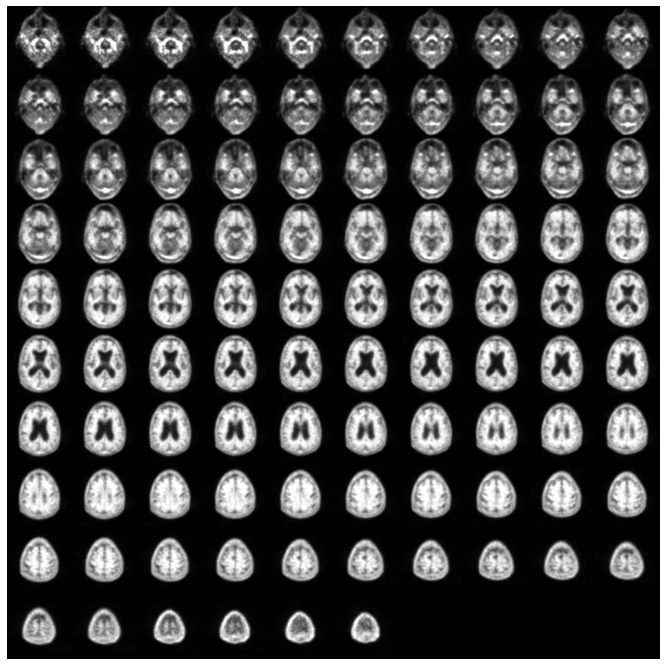

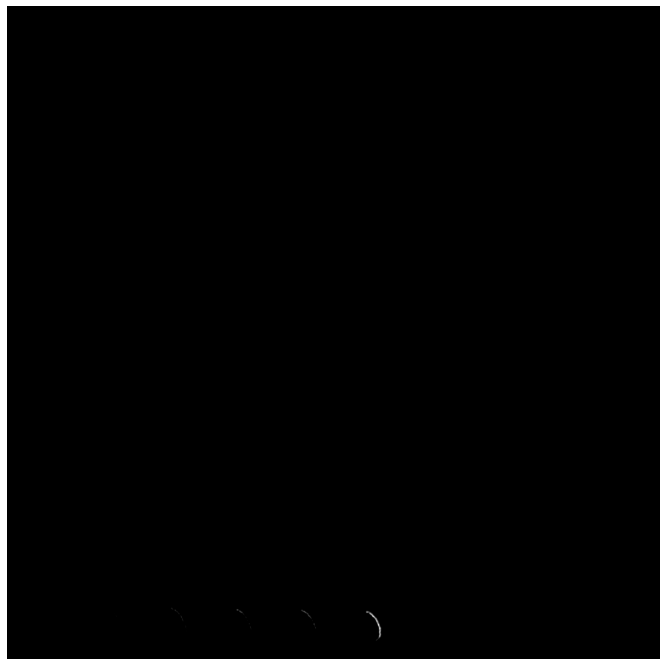

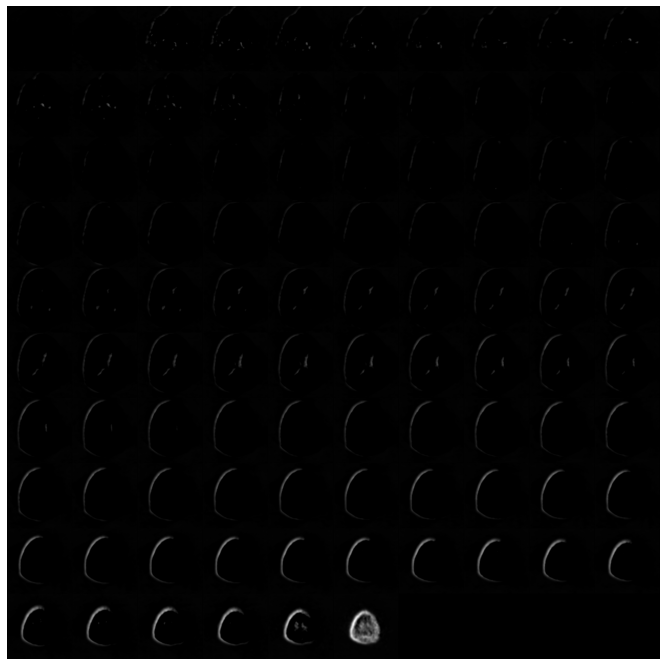

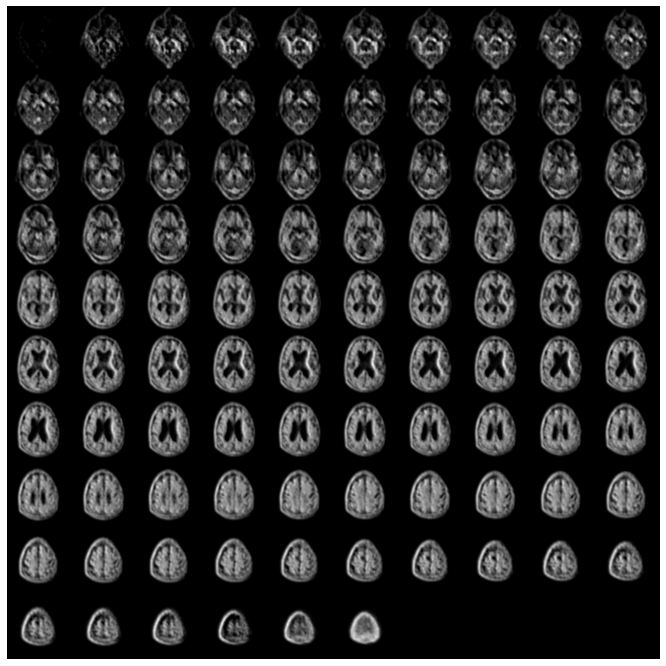

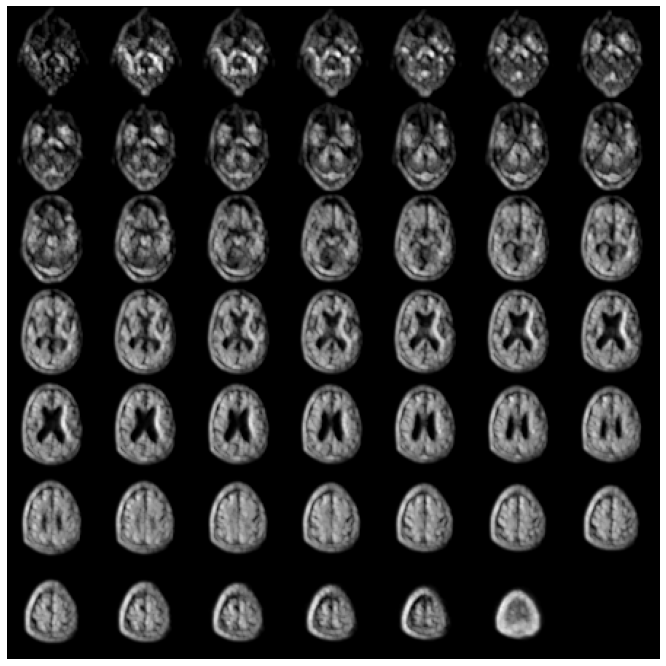

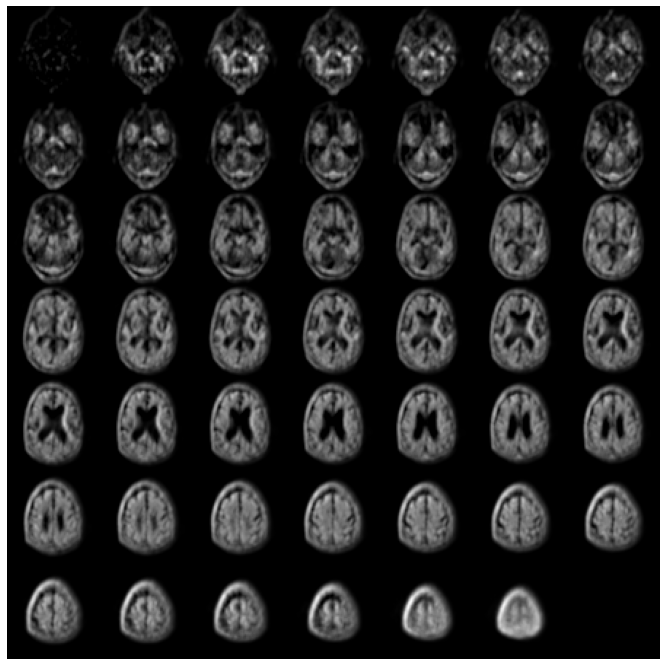

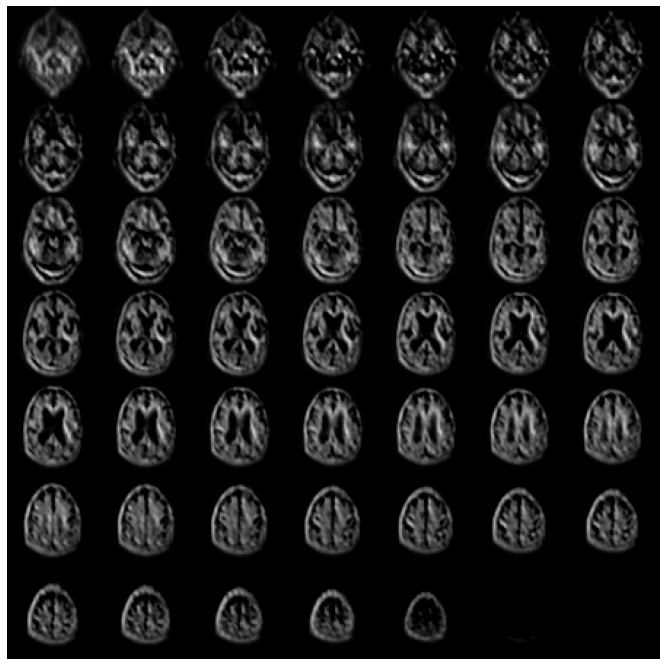

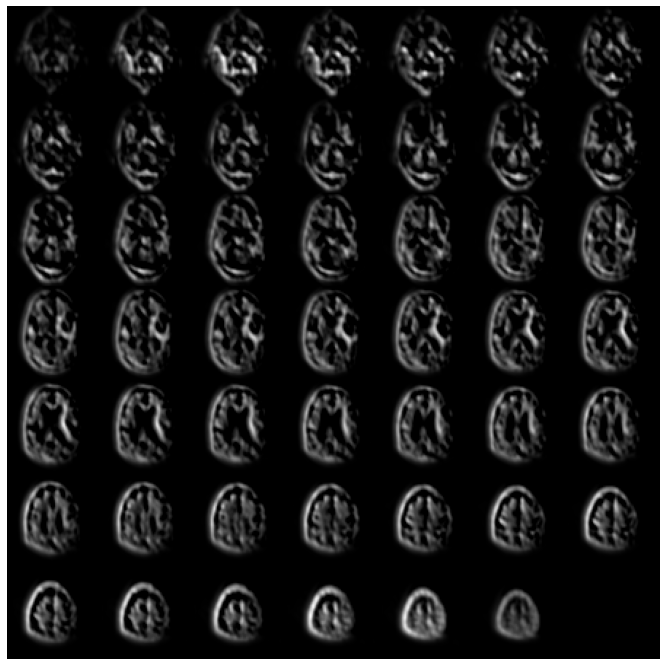

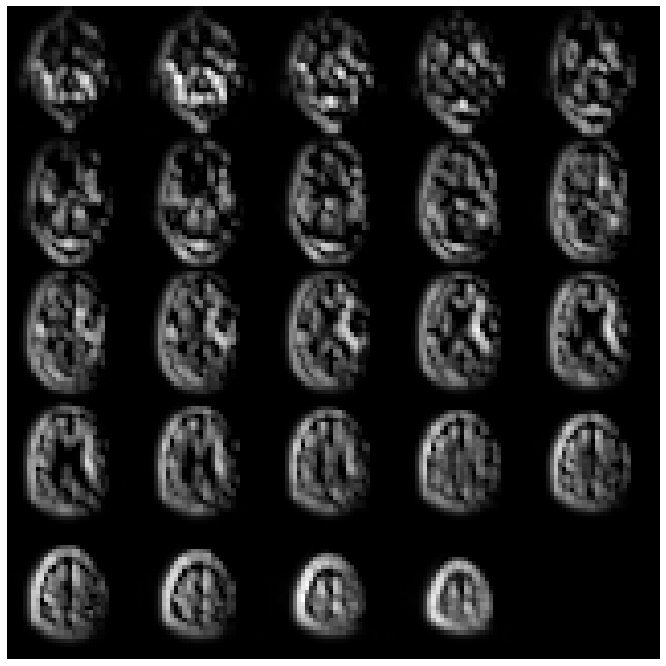

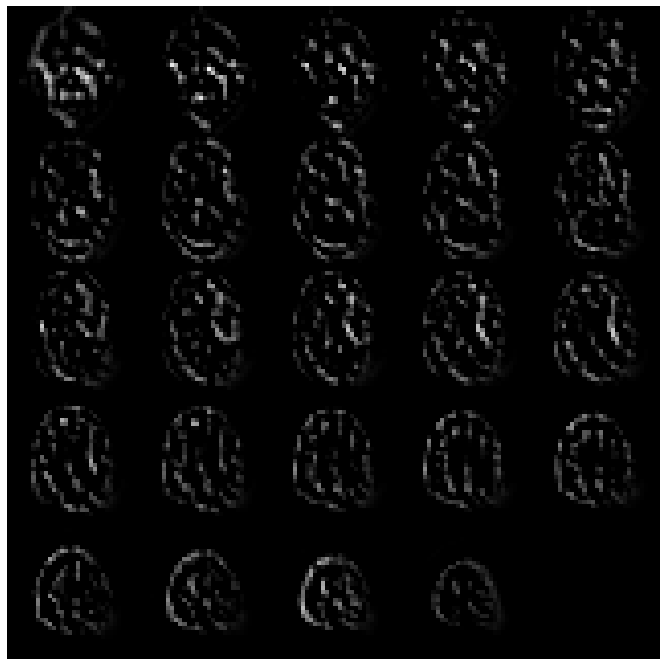

In [8]:
# Visualize contracting layers of U-Net
visualize_intermediate_layers(0, 10)

[ 2021-08-25 12:31:08 ] [>...................] 3.922% : Iterating | 000002      

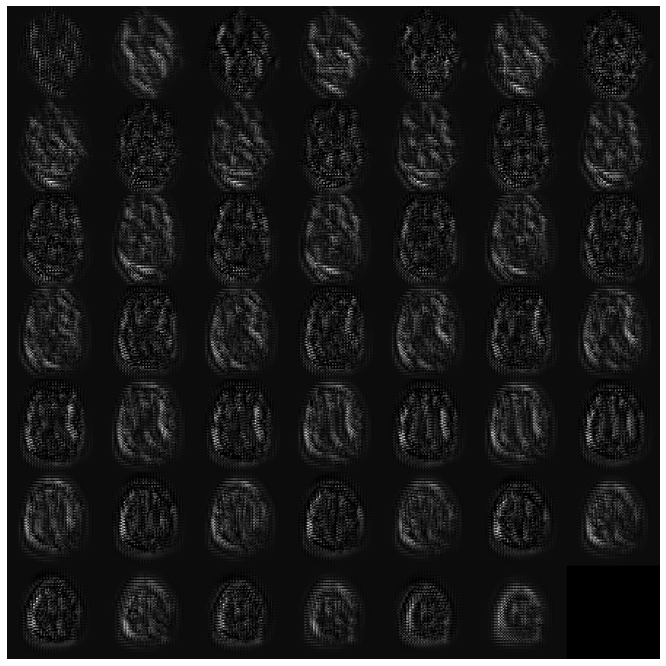

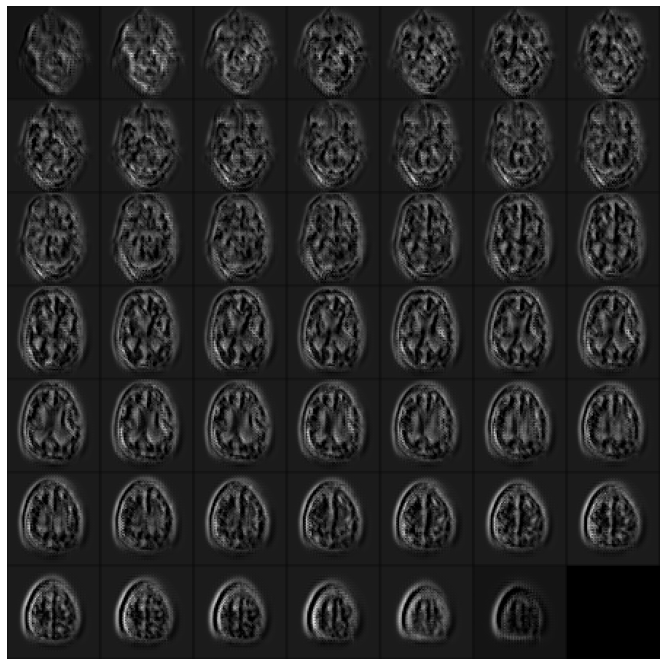

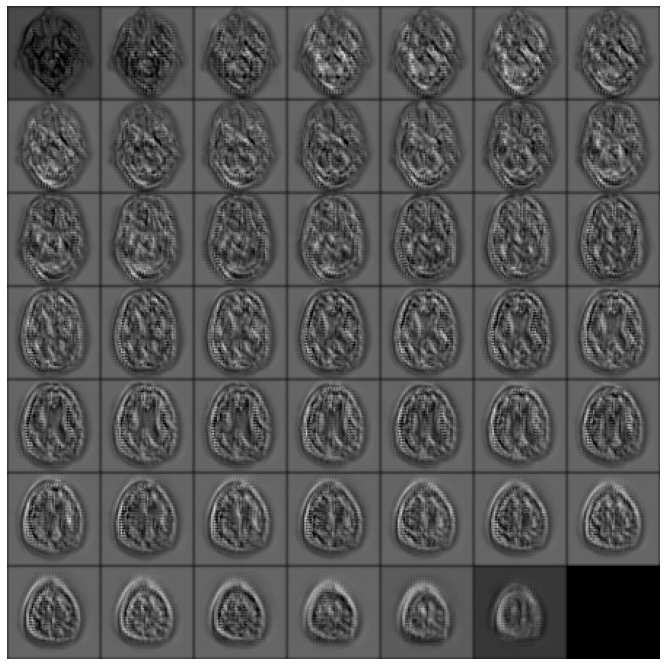

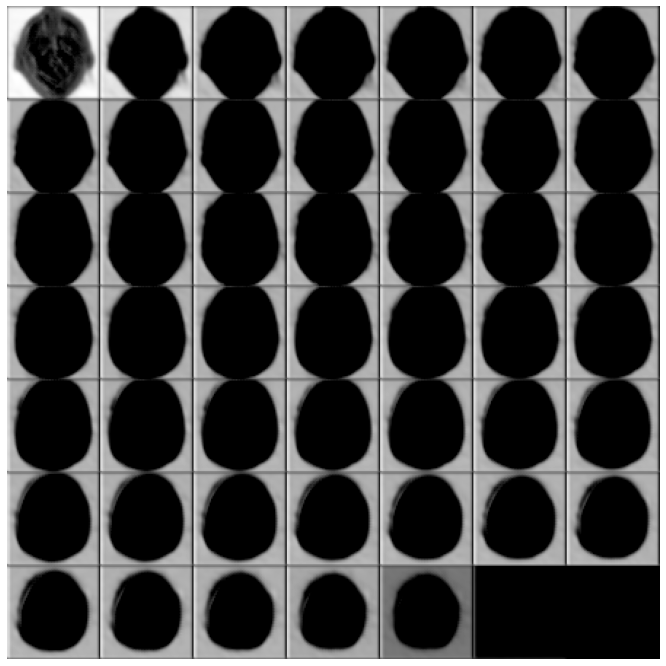

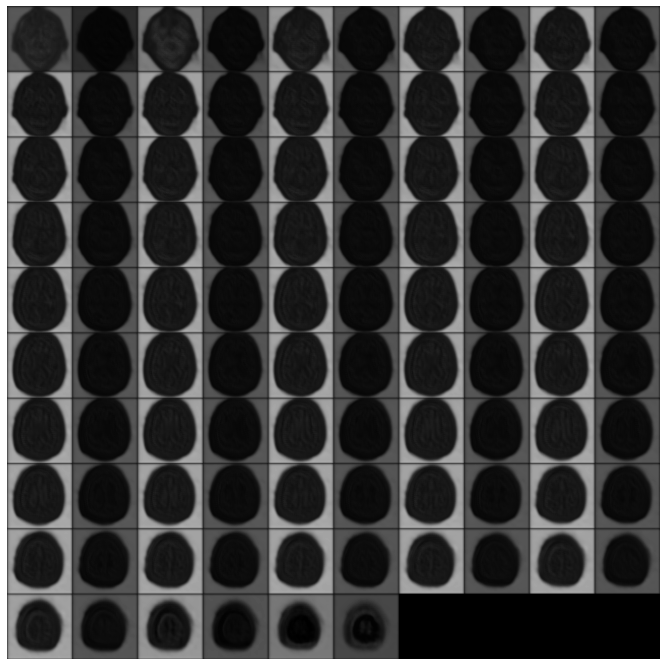

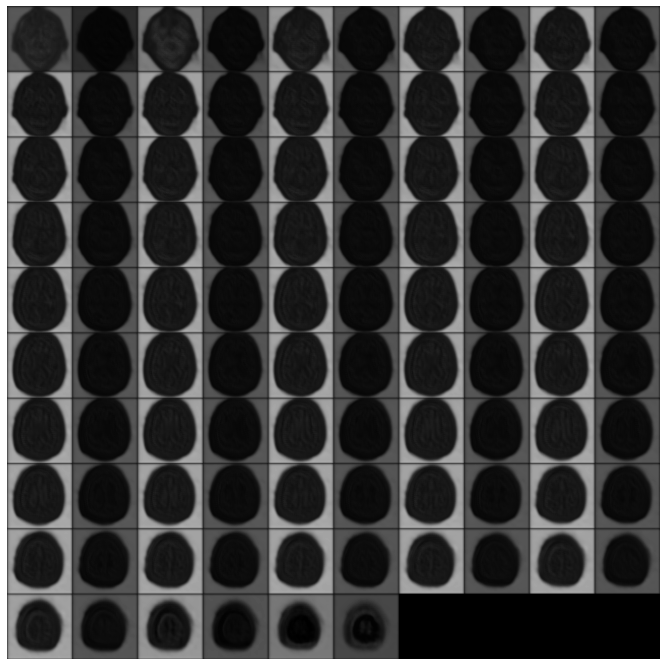

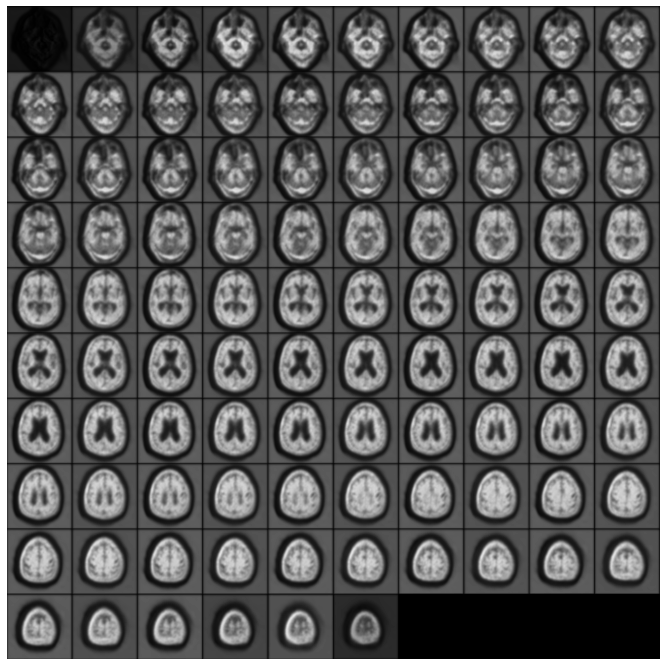

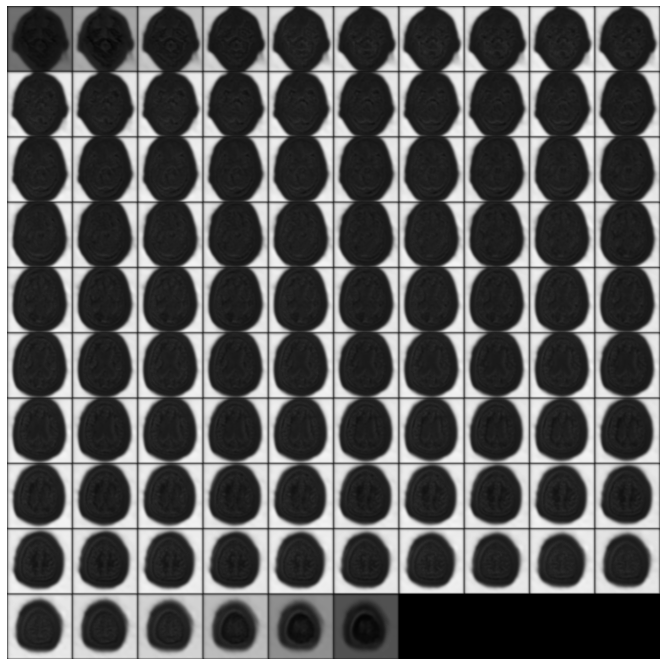

AssertionError: 

In [9]:
# Visualize expanding layers of U-Net
visualize_intermediate_layers(11, -1)